In [8]:
import math
from collections import defaultdict
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [9]:
df = pd.read_csv("iris.csv", header=None)
np.random.seed(0)
#store results of iterations in dict
test_res = defaultdict(list)
train_res = defaultdict(list)

for iteration in range(20):
    #shuffle data
    ds = df.sample(frac=1)

    #split data into 80% train, 20% test
    train, test = train_test_split(ds,test_size=0.2)
    train_att = train[[0,1,2,3]]
    test_att = test[[0,1,2,3]]

    #normalize data
    train_norm = (train_att - train_att.min()) / (train_att.max() - train_att.min())
    test_norm = (test_att - train_att.min()) / (train_att.max() - train_att.min())
    train_norm.fillna(0, inplace=True)
    test_norm.fillna(0, inplace=True)

    '''
    k - number of neighbors
    data - dataset
    instance - instance to classify
    '''
    def knn(k,data,instance):
        distances = data.apply(lambda row: math.dist(row,instance), axis=1)
        #get k closest instances (including the input instance)
        k_neighbors = distances.sort_values()[:k]
        #get class value with largest number of occurences
        predicted_class = df.loc[k_neighbors.index,[4]][4].mode()
        return predicted_class[0]

    '''
    train knn using training data
    return the accuracy of the model
    '''
    def train_knn(k,data):
        predictions = data.apply(lambda row: knn(k,train_norm,row), axis=1)
        actual_labels = df.loc[predictions.index,[4]]
        return predictions.eq(actual_labels[4].values).mean()

    for i in range(1,51,2):
        train_res[i].append(train_knn(i,train_norm))
        test_res[i].append(train_knn(i,test_norm))

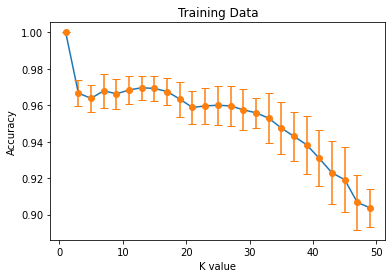

In [15]:
train_iter = []
train_acc = []
train_std = []

for k_val,res in train_res.items():
    train_iter.append(k_val)
    train_acc.append(np.average(res))
    train_std.append(np.std(res))

plt.plot(train_iter,train_acc)
plt.errorbar(train_iter,train_acc,yerr = train_std,fmt='o',capsize=4)
plt.xlabel("K value")
plt.ylabel("Accuracy")
plt.title("Training Data")
plt.show()

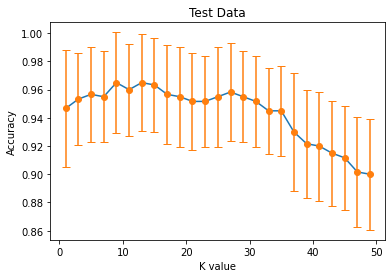

In [16]:
test_iter = []
test_acc = []
test_std = []

for k_val,res in test_res.items():
    test_iter.append(k_val)
    test_acc.append(np.average(res))
    test_std.append(np.std(res))


plt.plot(test_iter,test_acc)
plt.errorbar(test_iter,test_acc,yerr = test_std,fmt='o',capsize=4)
plt.xlabel("K value")
plt.ylabel("Accuracy")
plt.title("Test Data")
plt.show()